## Project Description
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\kiran\Desktop\datatrained\Internship\Final Evaluation projets\First-Phase-Evaluation-Projects--1-\baseball\baseball.csv")
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


#### Columns

In [3]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

### Target:
1. W - This indicates the number of Wins credited to a pitcher

### Labels:
2. R - This indicates Runs scored.
3. AB - plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction.
4. H - This means Hit. 
5. 2B - It is sometimes called a "two-bagger" or "two-base hit". hits on which the batter reaches second base safely without the contribution of a fielding error.
6. 3B - This measns a Triple.A triple is sometimes called a "three-bagger" or "three-base hit": hits on which the batter reaches third base safely without the contribution of a fielding error.
7. HR - This means Home runs. 
8. BB - This means Base on balls (also called a "walk"). It is  hitter not swinging at four pitches called out of the strike zone and awarded first base.
9. SO - Also denoted as "K" means Strikeout. It is number of batters who received strike three.
10. SB - This means Stolen base. It is  number of bases advanced by the runner while the ball is in the possession of the defense.
11. RA - This means Run Average. It refer to measures of the rate at which runs are allowed or scored.
12. ER - This means Earned run. It is number of runs that did not occur as a result of errors or passed balls.
13. ERA - This means Earned Run Average. It is total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched.
14. CG - This means Complete Game. number of games where player was the only pitcher for their team.
15. SHO - This means Shutout. It refers number of complete games pitched with no runs allowed.
16. SV - This means Save. It's credited to a pitcher who finishes a game for the winning team under certain prescribed circumstances.
17. E - This means Errors. 



### Analysing basic metrics

In [4]:
df.shape

(30, 17)

In [5]:
df.isna().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


#### Observations
- There are no null values
- All columns are numerical
- There are no Categorical values

In [7]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


#### Observations
- Distribution
    - Normally distributed (Since Mean = Median)
        - R
        - AB
        - 2B 
        - 3B
        - BB
        - SO
        - SB
        - ER
        - ERA
    - Right skewed (mean > median)
        - H
        - HR
        - CG
        - SV
        - E

    - LEFT skewed (mean < median)
        - RA
        - SHO

- NO Outliers can be observed

### Graphical univariate analysis

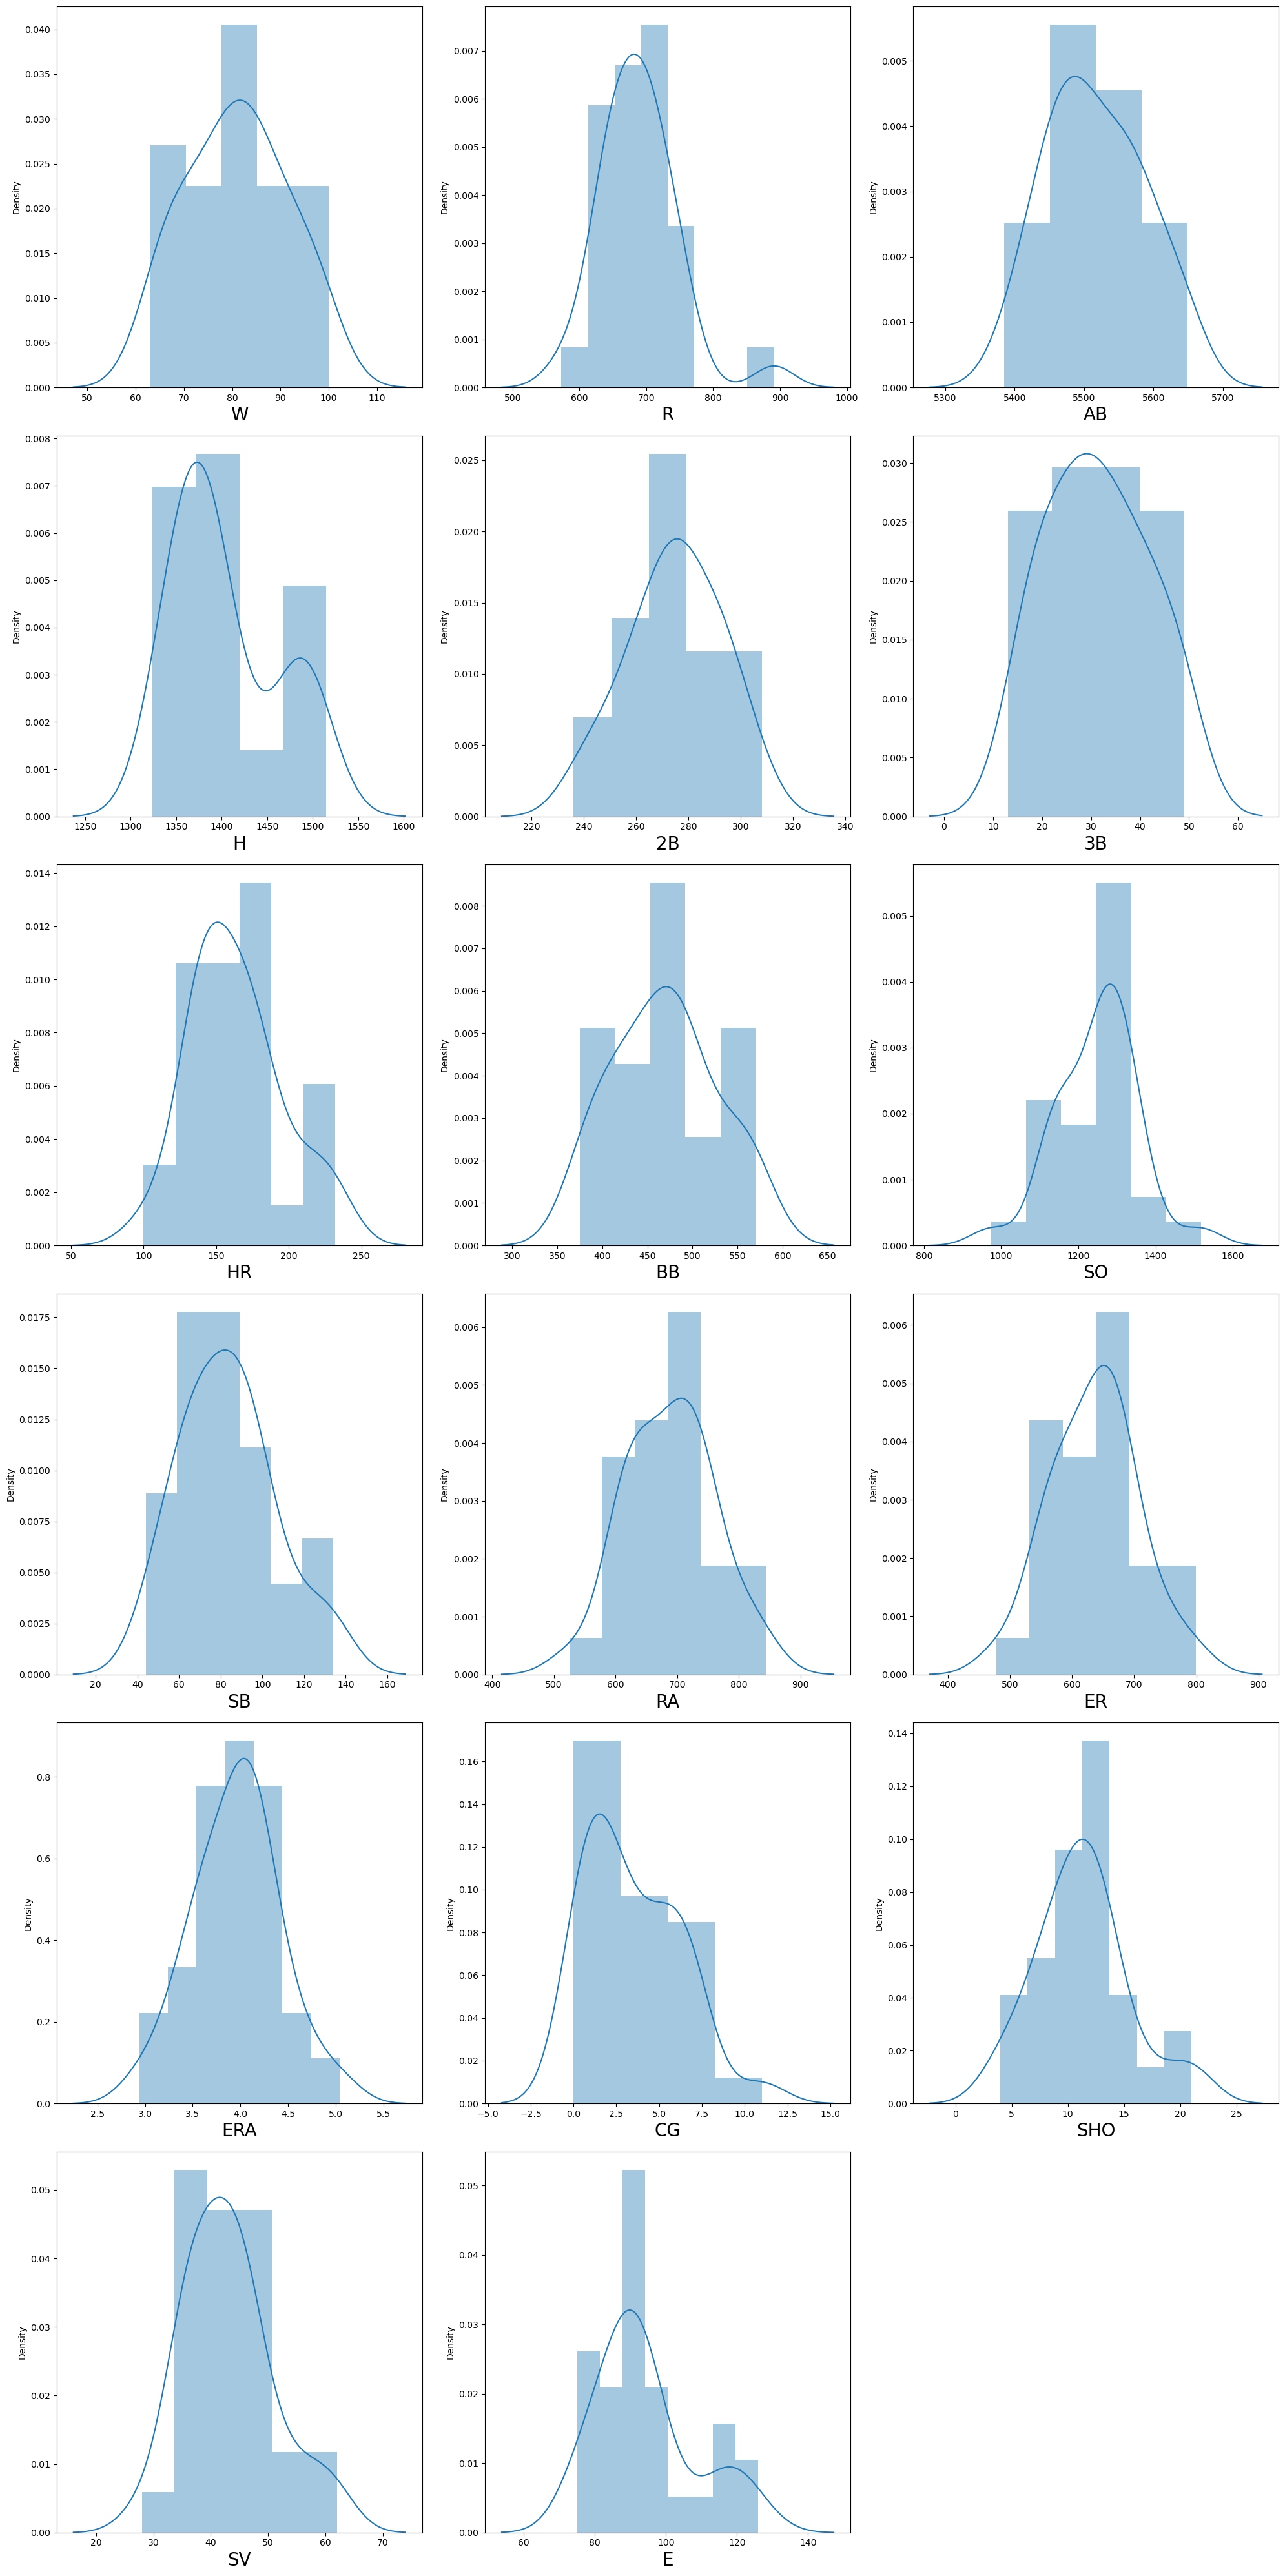

In [8]:
plt.figure(figsize=(20,40))
pn = 1
for column in df:
    
    sns.distplot(df[column],ax=plt.subplot(6,3,pn))
    plt.xlabel(column,fontsize = 20)
    pn +=1
    
plt.tight_layout()  

- From above visualization we can observe that 
    - almost all columns are normally distributed
    - a slight Right skeweness can be observed in E and CG columns 

### Bivariate analysis

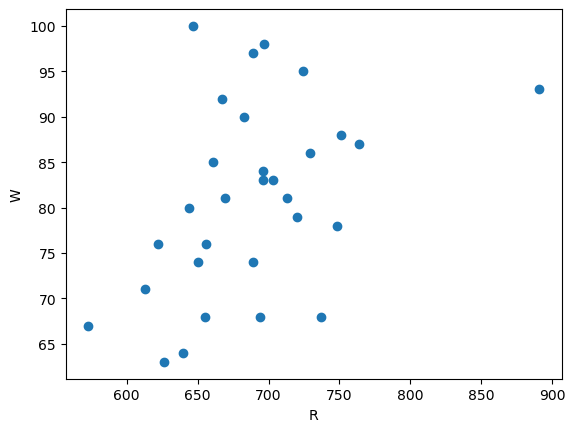

In [9]:
X= 'R'
Y = 'W'
plt.scatter(df[X],df[Y])
plt.xlabel(X)
plt.ylabel(Y)
plt.show()

positive corelation can be observed between R and W

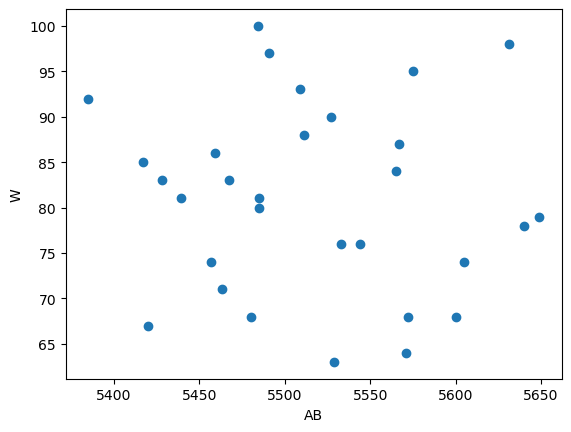

In [10]:
X= 'AB'
Y = 'W'
plt.scatter(df[X],df[Y])
plt.xlabel(X)
plt.ylabel(Y)
plt.show()

No corelation can be observed between AB and W

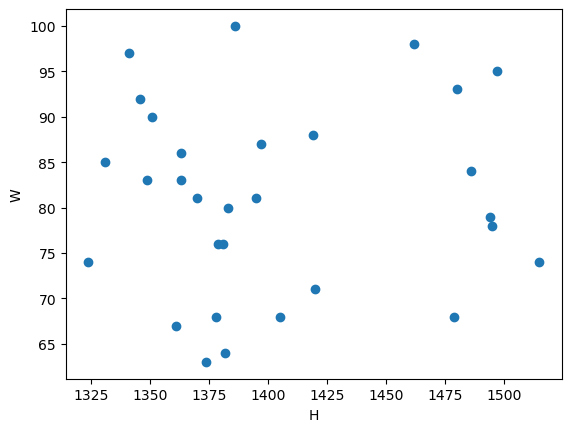

In [11]:
X= 'H'
Y = 'W'
plt.scatter(df[X],df[Y])
plt.xlabel(X)
plt.ylabel(Y)
plt.show()

No corelation can be observed between H and W

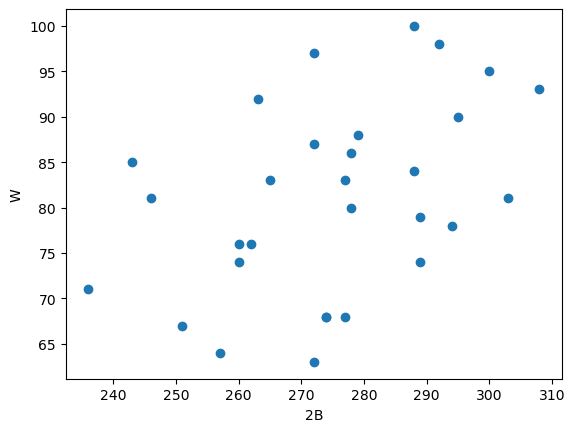

In [12]:
X= '2B'
Y = 'W'
plt.scatter(df[X],df[Y])
plt.xlabel(X)
plt.ylabel(Y)
plt.show()

Little Positive corelation can be observed between 2B and W

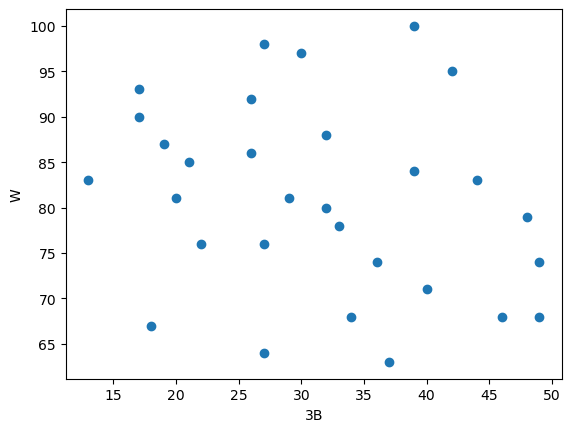

In [13]:
X= '3B'
Y = 'W'
plt.scatter(df[X],df[Y])
plt.xlabel(X)
plt.ylabel(Y)
plt.show()

No corelation can be observed between 3B and W

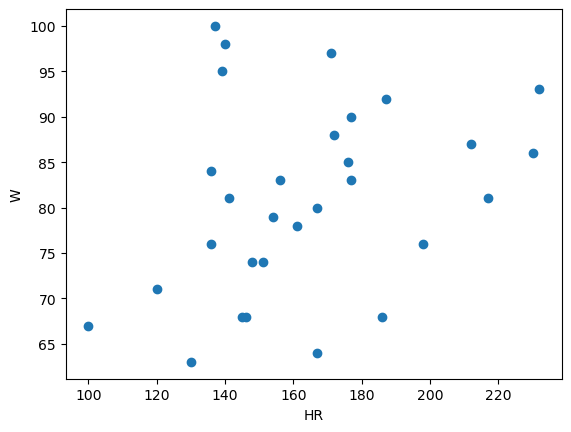

In [14]:
X= 'HR'
Y = 'W'
plt.scatter(df[X],df[Y])
plt.xlabel(X)
plt.ylabel(Y)
plt.show()

Positive corelation can be observed between HR and W

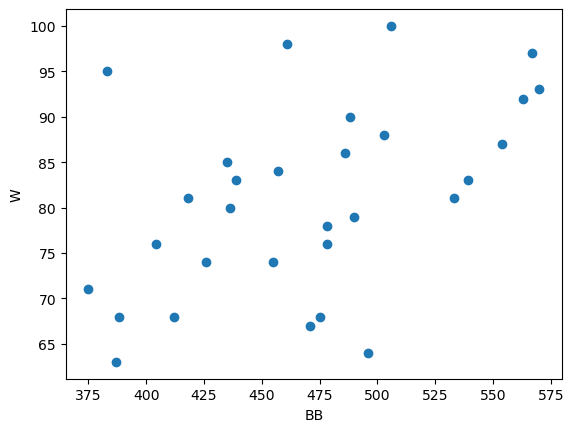

In [15]:
X= 'BB'
Y = 'W'
plt.scatter(df[X],df[Y])
plt.xlabel(X)
plt.ylabel(Y)
plt.show()

Little Positive corelation can be observed between BB and W

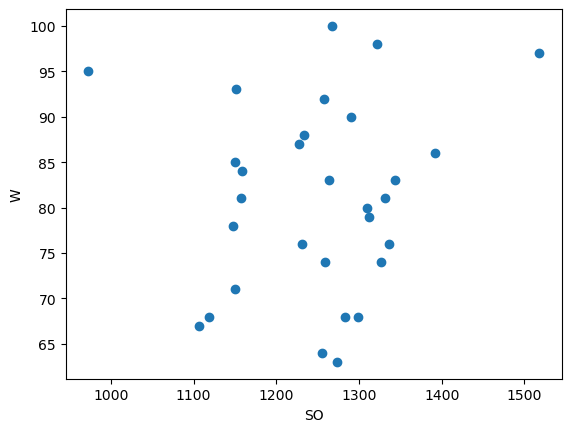

In [16]:
X= 'SO'
Y = 'W'
plt.scatter(df[X],df[Y])
plt.xlabel(X)
plt.ylabel(Y)
plt.show()

Little positive corelation can be observed between SO and W

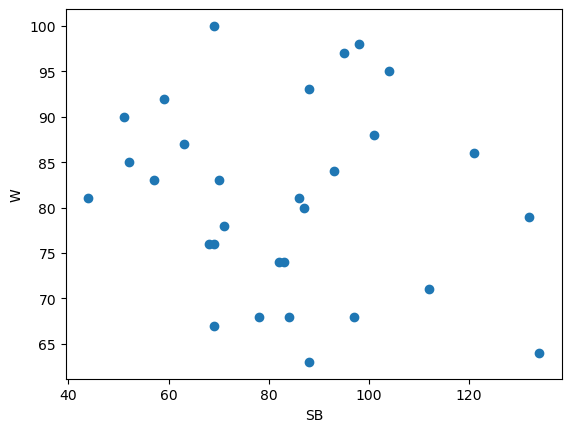

In [17]:
X= 'SB'
Y = 'W'
plt.scatter(df[X],df[Y])
plt.xlabel(X)
plt.ylabel(Y)
plt.show()

A little Negative corelation can be observed between SB and W

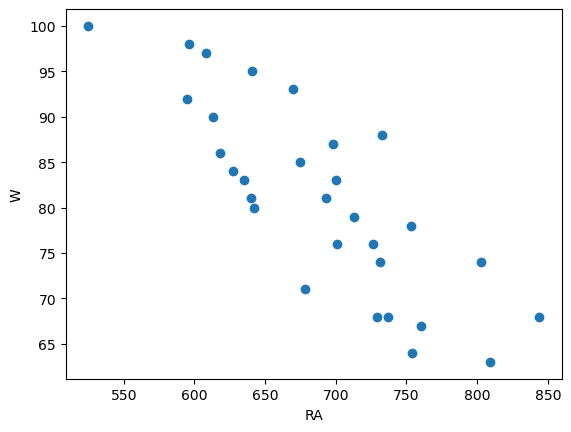

In [18]:
X= 'RA'
Y = 'W'
plt.scatter(df[X],df[Y])
plt.xlabel(X)
plt.ylabel(Y)
plt.show()

Strong Negative corelation can be observed between RA and W

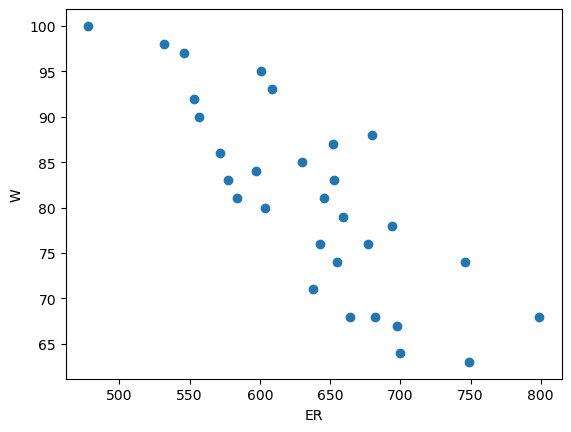

In [19]:
X= 'ER'
Y = 'W'
plt.scatter(df[X],df[Y])
plt.xlabel(X)
plt.ylabel(Y)
plt.show()

Strong Negative corelation can be observed between ER and W

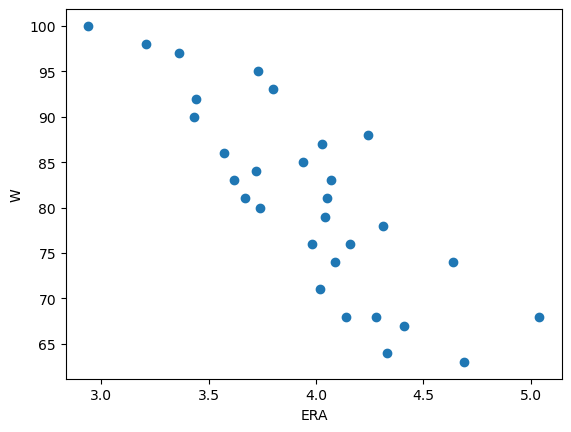

In [20]:
X= 'ERA'
Y = 'W'
plt.scatter(df[X],df[Y])
plt.xlabel(X)
plt.ylabel(Y)
plt.show()

Strong Negative corelation can be observed between ERA and W

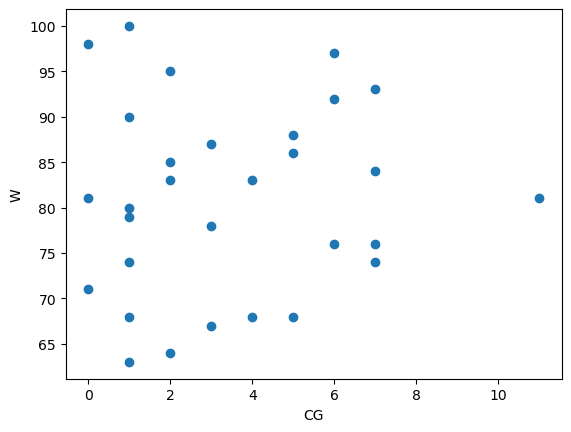

In [21]:
X= 'CG'
Y = 'W'
plt.scatter(df[X],df[Y])
plt.xlabel(X)
plt.ylabel(Y)
plt.show()

No corelation can be observed between CG and W

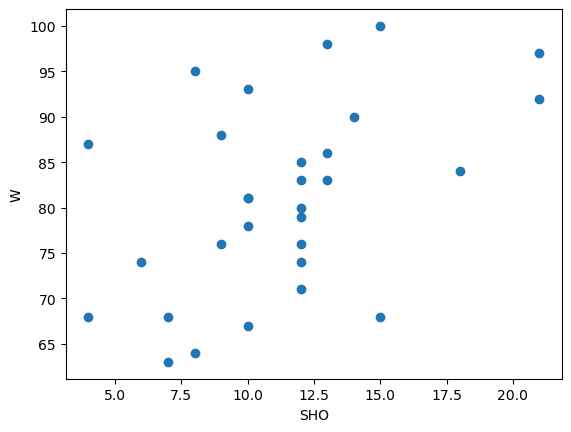

In [22]:
X= 'SHO'
Y = 'W'
plt.scatter(df[X],df[Y])
plt.xlabel(X)
plt.ylabel(Y)
plt.show()

Little Positive corelation can be observed between SHO and W

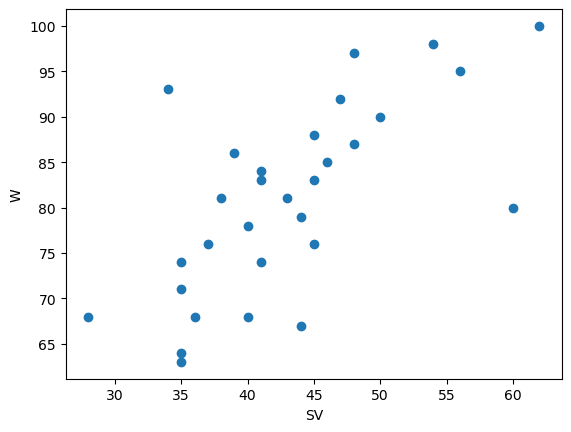

In [23]:
X= 'SV'
Y = 'W'
plt.scatter(df[X],df[Y])
plt.xlabel(X)
plt.ylabel(Y)
plt.show()

Strong Positive corelation can be observed between SV and W

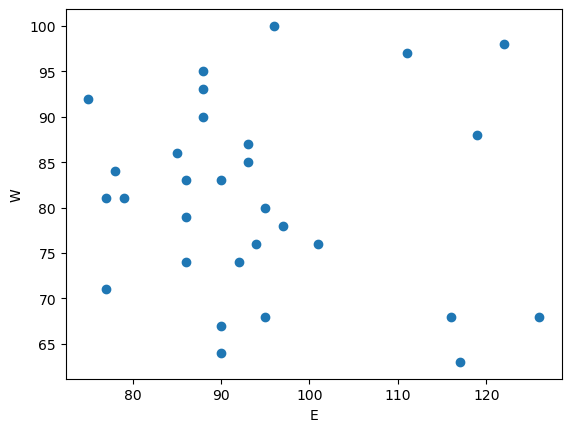

In [24]:
X= 'E'
Y = 'W'
plt.scatter(df[X],df[Y])
plt.xlabel(X)
plt.ylabel(Y)
plt.show()

No corelation can be observed between E and W

### Multivariate corelation analysis

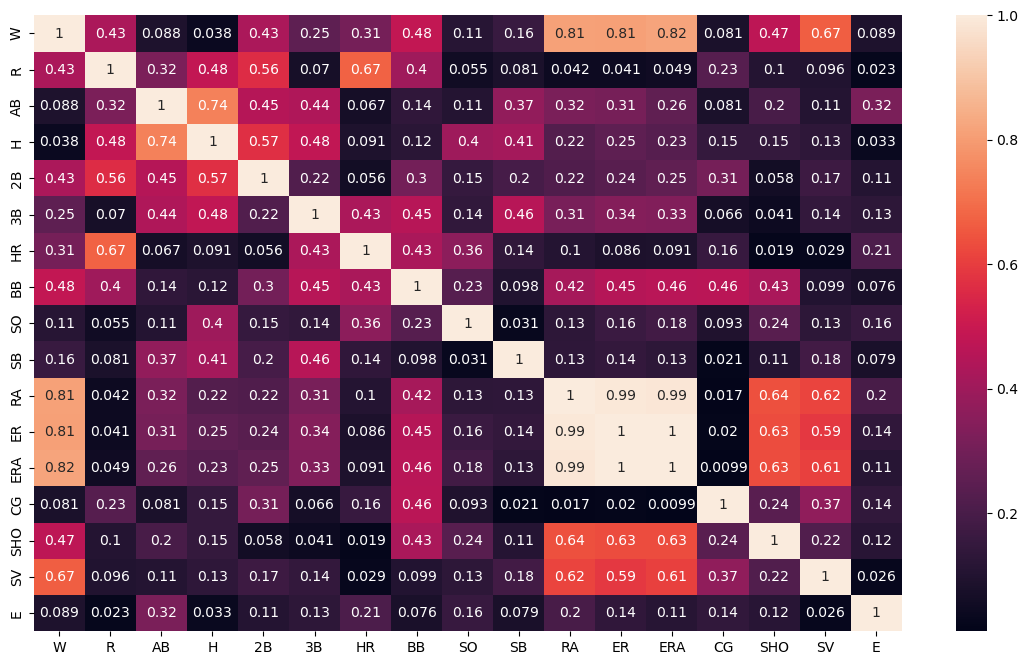

In [25]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr().abs(),annot=True,annot_kws={'size':10}) #annot display numbers(exp 0.26) in boxes and 10 is number font size
plt.show()

- It seems that there is High Multicolinearity between ERA,ER and RA and we need more proof.

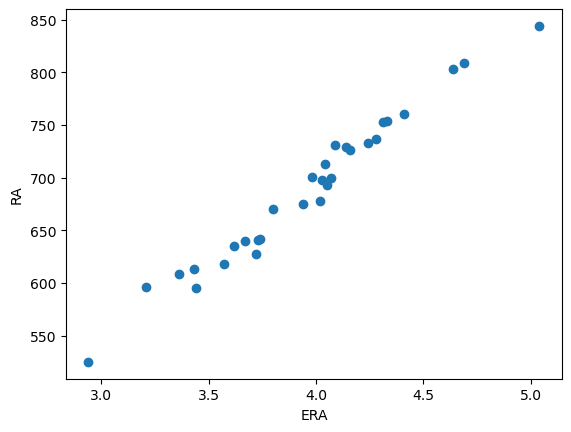

In [26]:
X= 'ERA'
Y = 'RA'
plt.scatter(df[X],df[Y])
plt.xlabel(X)
plt.ylabel(Y)
plt.show()

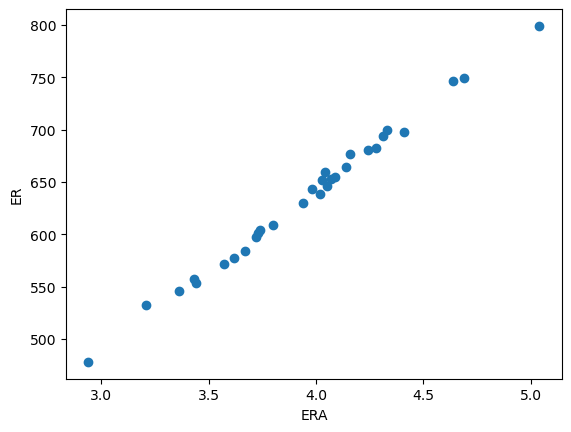

In [27]:
X= 'ERA'
Y = 'ER'
plt.scatter(df[X],df[Y])
plt.xlabel(X)
plt.ylabel(Y)
plt.show()

- Freom above graphs we can say that there is strong co relation between ERA,ER and RA
- since ERA has more corelatio with W we can remove ER and RA

In [28]:
df.drop(columns=['ER','RA'],inplace=True)

In [29]:
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,4.31,3,10,40,97


# Outlier Treatment

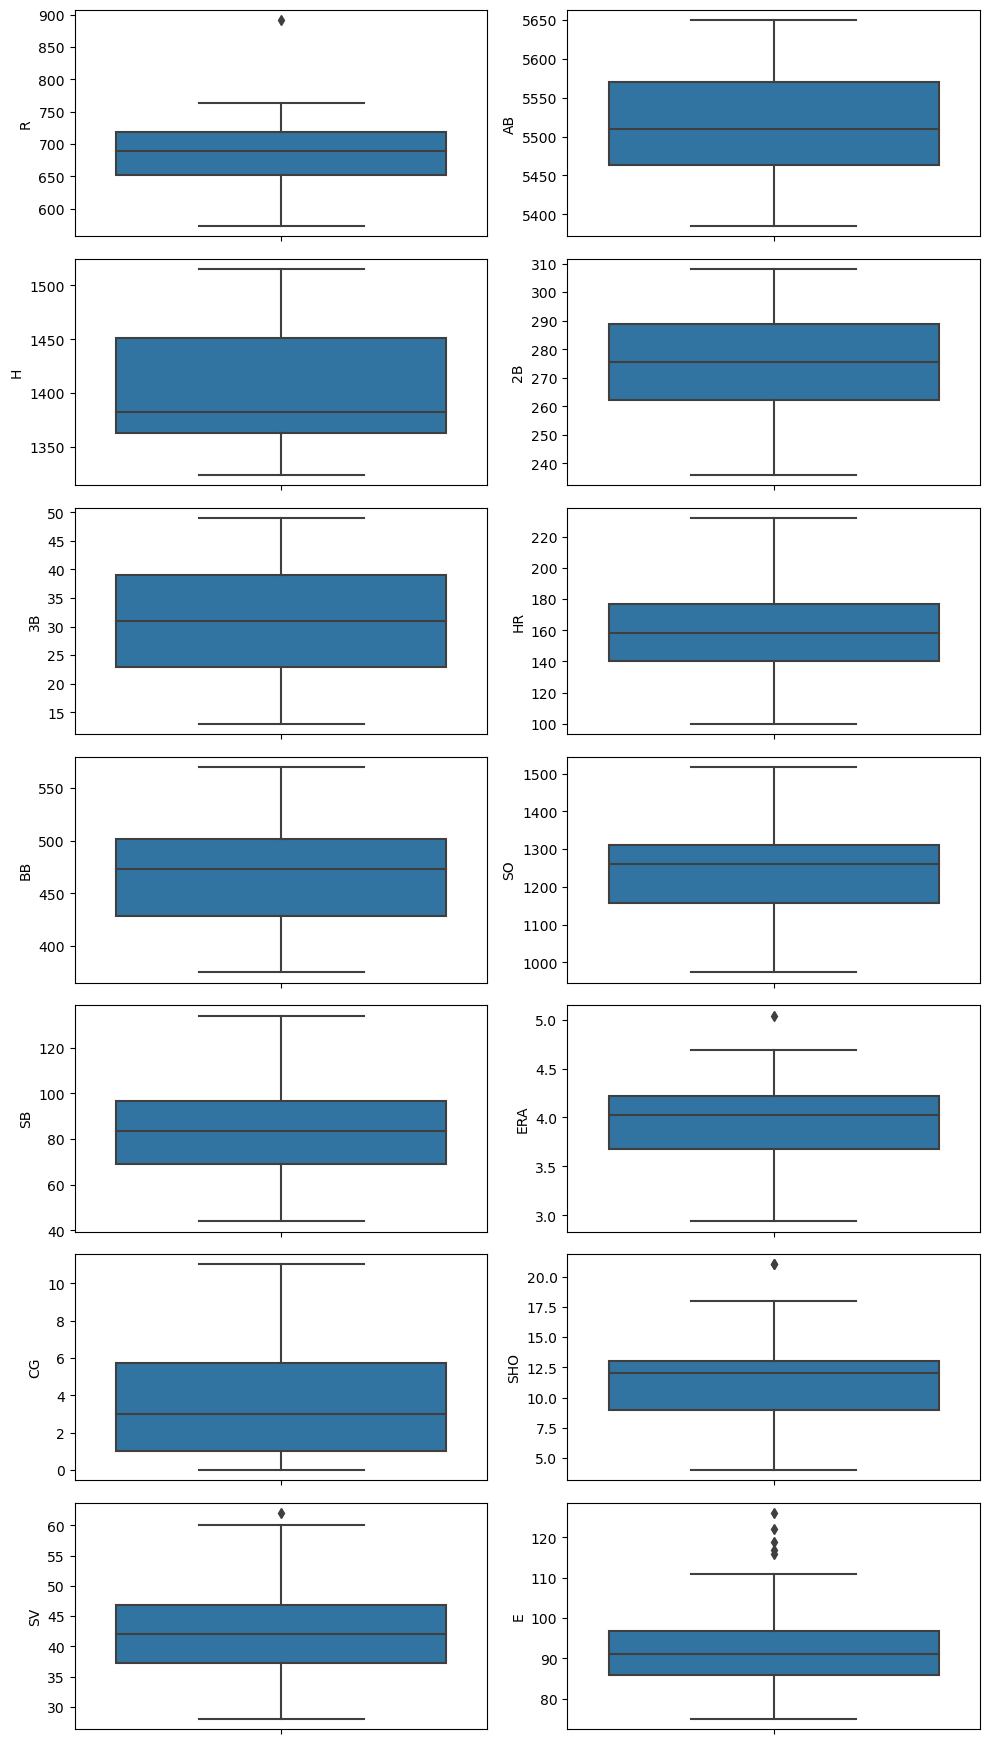

In [30]:
# checking for outliers
plt.figure(figsize=(10,20))
pn = 1
for i in df.drop(columns = 'W').columns:
    if pn <= 16:
        sns.boxplot(y=df[i],ax=plt.subplot(8,2,pn))
        pn +=1
              
plt.tight_layout() 

WE can observe that there are Few outliers which are needed tobe removed

since there are  outliers we shell use z score with 3 as threshold

In [31]:
# using z score method
from scipy.stats import zscore
z = np.abs(zscore(df.drop(columns = 'W')))
z[z>3].count().sum()

1

There is only 1 outlier found which is needed to be removed

In [32]:
x=df[z<3.5]
x['W']=df['W']

x=x.dropna()
x.shape

(29, 15)

In [33]:
y = x['W']
x=x.drop(columns='W')

### Skeweness

In [34]:
x.skew().abs() 

R      0.215364
AB     0.169573
H      0.783772
2B     0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO     0.233815
SB     0.494966
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

Since all columns have skeweness less than 1 we can continue 

In [35]:
x.shape

(29, 14)

Sice there are less no of rows and columns we can continue without dimension reduction

### Standerd Scaler

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled,columns=x.columns)

### Train test Split

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
lr = LinearRegression()

In [38]:
# finding best random state
tts_df = pd.DataFrame(data=None,columns=['Random state','Train accuracy','Test accuracy'])
for i in range(1,1000):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.20,random_state=i)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    train_score = r2_score(y_train,pred_train)
    test_score = r2_score(y_test,pred_test)
    if round(train_score*100,0) == round(test_score*100,0):
        tts_df =tts_df.append({'Random state':i,'Train accuracy':train_score*100,'Test accuracy':test_score*100},ignore_index=True)

    
tts_df.sort_values('Test accuracy',ascending=False)  


,Random state,Train accuracy,Test accuracy
2,375.0,93.132323,93.430835
4,425.0,93.158446,92.820122
3,377.0,93.489933,92.698832
1,281.0,93.330349,92.602446
0,103.0,93.243133,92.592881


- Therefore best random state is 375

In [39]:
# Training model at best Random state
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.20,random_state=375)

## Training models

#### Linear Regression

In [40]:
lr.fit(x_train,y_train)
pred_train = lr.predict(x_train)
pred_test = lr.predict(x_test)
lr_pred_test = lr.predict(x_test)
lr_r2_test_score = r2_score(y_test,pred_test)
print(lr_r2_test_score*100,"%")

93.43083487044458 %


In [41]:
# Find best cv using k-fold
from sklearn.model_selection import KFold
for i in range(3,8):
    # Set the number of folds for cross-validation
    num_folds = i
    model=LinearRegression()

    # Create a KFold object
    kf = KFold(n_splits=num_folds, shuffle=True,random_state=150)

    # Initialize an empty list to store the MSE scores
    r2_scores = []

    # Perform K-fold cross-validation
    for train_index, test_index in kf.split(x_scaled):
        # Get the training and test sets for this fold
        X_train_1, X_test_1 = x_scaled.iloc[train_index], x_scaled.iloc[test_index]
        y_train_1, y_test_1 = y.iloc[train_index], y.iloc[test_index]

        # Fit the model on the training data
        model.fit(X_train_1, y_train_1)

        # Make predictions on the test data
        y_pred = model.predict(X_test_1)

        # Calculate the MSE for this fold and append to the list
        r2_scores.append(r2_score(y_test_1, y_pred))

    # Calculate the average MSE score
    avg_mse_score = np.mean(r2_scores)

    # Print the average MSE score
    print('CV = ',i,"Average cv r2 score:", round(avg_mse_score*100,5),'Difference = ',round(np.abs(avg_mse_score-lr_r2_test_score)*100,4))

CV =  3 Average cv r2 score: 27.70126 Difference =  65.7296
CV =  4 Average cv r2 score: 65.98293 Difference =  27.4479
CV =  5 Average cv r2 score: 47.21276 Difference =  46.2181
CV =  6 Average cv r2 score: 69.09368 Difference =  24.3372
CV =  7 Average cv r2 score: 24.04893 Difference =  69.3819


- cv = 6 is giving comparitively better result
- There is very high difference between cv score and r2 score This is because of less number of rows and comparitevily more no of columns

In [42]:
# creating df for storing cv score and acc score
ms_df = pd.DataFrame(data=None,columns=['Model','CV score','Test accuracy','Difference'])

In [43]:
#best cv score at cv = 6
# Set the number of folds for cross-validation
num_folds = 6
model=LinearRegression()

# Create a KFold object
kf = KFold(n_splits=num_folds, shuffle=True,random_state=150)

# Initialize an empty list to store the MSE scores
r2_scores = []

# Perform K-fold cross-validation
for train_index, test_index in kf.split(x_scaled):
    # Get the training and test sets for this fold
    X_train_1, X_test_1 = x_scaled.iloc[train_index], x_scaled.iloc[test_index]
    y_train_1, y_test_1 = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data
    model.fit(X_train_1, y_train_1)

    # Make predictions on the test data
    y_pred = model.predict(X_test_1)

    # Calculate the MSE for this fold and append to the list
    r2_scores.append(r2_score(y_test_1, y_pred))

# Calculate the average MSE score
avg_r2_score = np.mean(r2_scores)

# Print the average MSE score
print('\nCross Validation score = ',round(avg_r2_score*100,6),'%','\nr2 score = ',round(lr_r2_test_score*100,4),'%','\nDifference = ',round(np.abs(lr_r2_test_score*100 - avg_r2_score*100),4),'%',end = '\n\n')
ms_df = ms_df.append({'Model':'Linear regression','CV score':round(avg_r2_score*100,4),'Test accuracy':round(lr_r2_test_score*100,4),'Difference':round(np.abs(lr_r2_test_score*100 - avg_r2_score*100),4)},ignore_index=True)


Cross Validation score =  69.093682 % 
r2 score =  93.4308 % 
Difference =  24.3372 %



##### DecisionTreeRegressor

In [44]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr_pred_test = dtr.predict(x_test)
dtr_r2_test_score = r2_score(y_test,dtr_pred_test)
print(dtr_r2_test_score*100,"%")

71.20245085524637 %


In [45]:
#best cv score at cv = 6
# Set the number of folds for cross-validation
num_folds = 6
model=DecisionTreeRegressor()

# Create a KFold object
kf = KFold(n_splits=num_folds, shuffle=True,random_state=150)

# Initialize an empty list to store the MSE scores
r2_scores = []

# Perform K-fold cross-validation
for train_index, test_index in kf.split(x_scaled):
    # Get the training and test sets for this fold
    X_train_1, X_test_1 = x_scaled.iloc[train_index], x_scaled.iloc[test_index]
    y_train_1, y_test_1 = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data
    model.fit(X_train_1, y_train_1)

    # Make predictions on the test data
    y_pred = model.predict(X_test_1)

    # Calculate the MSE for this fold and append to the list
    r2_scores.append(r2_score(y_test_1, y_pred))

# Calculate the average MSE score
avg_r2_score = np.mean(r2_scores)

# Print the average MSE score
print('\nCross Validation score = ',round(avg_r2_score*100,6),'%','\nr2 score = ',round(dtr_r2_test_score*100,4),'%','\nDifference = ',round(np.abs(dtr_r2_test_score*100 - avg_r2_score*100),4),'%',end = '\n\n')
ms_df = ms_df.append({'Model':'Decision Tree regression','CV score':round(avg_r2_score*100,4),'Test accuracy':round(dtr_r2_test_score*100,4),'Difference':round(np.abs(dtr_r2_test_score*100 - avg_r2_score*100),4)},ignore_index=True)


Cross Validation score =  29.048439 % 
r2 score =  71.2025 % 
Difference =  42.154 %



##### RandomForestRegressor

In [46]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr_pred_test = rfr.predict(x_test)
rfr_r2_test_score = r2_score(y_test,rfr_pred_test)

print(rfr_r2_test_score*100,"%")

70.80086290528465 %


In [47]:
#best cv score at cv = 6
# Set the number of folds for cross-validation
num_folds = 6
model=RandomForestRegressor()

# Create a KFold object
kf = KFold(n_splits=num_folds, shuffle=True,random_state=150)

# Initialize an empty list to store the MSE scores
r2_scores = []

# Perform K-fold cross-validation
for train_index, test_index in kf.split(x_scaled):
    # Get the training and test sets for this fold
    X_train_1, X_test_1 = x_scaled.iloc[train_index], x_scaled.iloc[test_index]
    y_train_1, y_test_1 = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data
    model.fit(X_train_1, y_train_1)

    # Make predictions on the test data
    y_pred = model.predict(X_test_1)

    # Calculate the MSE for this fold and append to the list
    r2_scores.append(r2_score(y_test_1, y_pred))

# Calculate the average MSE score
avg_r2_score = np.mean(r2_scores)

# Print the average MSE score
print('\nCross Validation score = ',round(avg_r2_score*100,6),'%','\nr2 score = ',round(rfr_r2_test_score*100,4),'%','\nDifference = ',round(np.abs(rfr_r2_test_score*100 - avg_r2_score*100),4),'%',end = '\n\n')
ms_df = ms_df.append({'Model':'Random forest regression','CV score':round(avg_r2_score*100,4),'Test accuracy':round(rfr_r2_test_score*100,4),'Difference':round(np.abs(rfr_r2_test_score*100 - avg_r2_score*100),4)},ignore_index=True)


Cross Validation score =  59.494529 % 
r2 score =  70.8009 % 
Difference =  11.3063 %



#### AdaBoostRegressor

In [48]:
from sklearn.ensemble import AdaBoostRegressor

abr = AdaBoostRegressor()
abr.fit(x_train,y_train)
abr_pred_test = abr.predict(x_test)
abr_r2_test_score = r2_score(y_test,abr_pred_test)
print(abr_r2_test_score*100,"%")

69.19795005626001 %


In [49]:
#best cv score at cv = 6
# Set the number of folds for cross-validation
num_folds = 6
model=AdaBoostRegressor()

# Create a KFold object
kf = KFold(n_splits=num_folds, shuffle=True,random_state=150)

# Initialize an empty list to store the MSE scores
r2_scores = []

# Perform K-fold cross-validation
for train_index, test_index in kf.split(x_scaled):
    # Get the training and test sets for this fold
    X_train_1, X_test_1 = x_scaled.iloc[train_index], x_scaled.iloc[test_index]
    y_train_1, y_test_1 = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data
    model.fit(X_train_1, y_train_1)

    # Make predictions on the test data
    y_pred = model.predict(X_test_1)

    # Calculate the MSE for this fold and append to the list
    r2_scores.append(r2_score(y_test_1, y_pred))

# Calculate the average MSE score
avg_r2_score = np.mean(r2_scores)

# Print the average MSE score
print('\nCross Validation score = ',round(avg_r2_score*100,6),'%','\nr2 score = ',round(abr_r2_test_score*100,4),'%','\nDifference = ',round(np.abs(abr_r2_test_score*100 - avg_r2_score*100),4),'%',end = '\n\n')
ms_df = ms_df.append({'Model':'Ada Boost regression','CV score':round(avg_r2_score*100,4),'Test accuracy':round(abr_r2_test_score*100,4),'Difference':round(np.abs(abr_r2_test_score*100 - avg_r2_score*100),4)},ignore_index=True)


Cross Validation score =  46.952236 % 
r2 score =  69.198 % 
Difference =  22.2457 %



#### GradientBoostingRegressor

In [50]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)
gbr_pred_test = gbr.predict(x_test)
gbr_r2_test_score = r2_score(y_test,gbr_pred_test)
print(gbr_r2_test_score*100,"%")

75.78019683372601 %


In [51]:
#best cv score at cv = 6
# Set the number of folds for cross-validation
num_folds = 6
model=GradientBoostingRegressor()

# Create a KFold object
kf = KFold(n_splits=num_folds, shuffle=True,random_state=150)

# Initialize an empty list to store the MSE scores
r2_scores = []

# Perform K-fold cross-validation
for train_index, test_index in kf.split(x_scaled):
    # Get the training and test sets for this fold
    X_train_1, X_test_1 = x_scaled.iloc[train_index], x_scaled.iloc[test_index]
    y_train_1, y_test_1 = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data
    model.fit(X_train_1, y_train_1)

    # Make predictions on the test data
    y_pred = model.predict(X_test_1)

    # Calculate the MSE for this fold and append to the list
    r2_scores.append(r2_score(y_test_1, y_pred))

# Calculate the average MSE score
avg_r2_score = np.mean(r2_scores)

# Print the average MSE score
print('\nCross Validation score = ',round(avg_r2_score*100,6),'%','\nr2 score = ',round(gbr_r2_test_score*100,4),'%','\nDifference = ',round(np.abs(gbr_r2_test_score*100 - avg_r2_score*100),4),'%',end = '\n\n')
ms_df = ms_df.append({'Model':'Gradient Boost regression','CV score':round(avg_r2_score*100,4),'Test accuracy':round(gbr_r2_test_score*100,4),'Difference':round(np.abs(gbr_r2_test_score*100 - avg_r2_score*100),4)},ignore_index=True)


Cross Validation score =  53.588165 % 
r2 score =  75.7802 % 
Difference =  22.192 %



#### XGBRegressor

In [52]:
from xgboost import XGBRegressor
xgbr = XGBRegressor()
xgbr.fit(x_train,y_train)
xgbr_pred_test = xgbr.predict(x_test)
xgbr_r2_test_score = r2_score(y_test,xgbr_pred_test)
print(xgbr_r2_test_score*100,"%")

67.35661833957556 %


In [53]:
#best cv score at cv = 6
# Set the number of folds for cross-validation
num_folds = 6
model=XGBRegressor()

# Create a KFold object
kf = KFold(n_splits=num_folds, shuffle=True,random_state=150)

# Initialize an empty list to store the MSE scores
r2_scores = []

# Perform K-fold cross-validation
for train_index, test_index in kf.split(x_scaled):
    # Get the training and test sets for this fold
    X_train_1, X_test_1 = x_scaled.iloc[train_index], x_scaled.iloc[test_index]
    y_train_1, y_test_1 = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data
    model.fit(X_train_1, y_train_1)

    # Make predictions on the test data
    y_pred = model.predict(X_test_1)

    # Calculate the MSE for this fold and append to the list
    r2_scores.append(r2_score(y_test_1, y_pred))

# Calculate the average MSE score
avg_r2_score = np.mean(r2_scores)

# Print the average MSE score
print('\nCross Validation score = ',round(avg_r2_score*100,6),'%','\nr2 score = ',round(xgbr_r2_test_score*100,4),'%','\nDifference = ',round(np.abs(xgbr_r2_test_score*100 - avg_r2_score*100),4),'%',end = '\n\n')
ms_df = ms_df.append({'Model':' XGBoost regression','CV score':round(avg_r2_score*100,4),'Test accuracy':round(xgbr_r2_test_score*100,4),'Difference':round(np.abs(xgbr_r2_test_score*100 - avg_r2_score*100),4)},ignore_index=True)


Cross Validation score =  30.10696 % 
r2 score =  67.3566 % 
Difference =  37.2497 %



In [54]:
ms_df

,Model,CV score,Test accuracy,Difference
0,Linear regression,69.0937,93.4308,24.3372
1,Decision Tree regression,29.0484,71.2025,42.1540
2,Random forest regression,59.4945,70.8009,11.3063
3,Ada Boost regression,46.9522,69.1980,22.2457
4,Gradient Boost regression,53.5882,75.7802,22.1920
5,XGBoost regression,30.1070,67.3566,37.2497


Linear Regression is giving best test accuracy and cv scores therefore we can use Linear Regression for our problem 

### Regularization

In [55]:
from sklearn.linear_model import Lasso,LassoCV,Ridge,RidgeCV

##### Lasso

In [56]:
lassocv = LassoCV(alphas=None,normalize=True,max_iter=10)
lassocv.fit(x_train,y_train)
lassocv.score(x_test,y_test)
lasalp=lassocv.alpha_
lasso = Lasso(lasalp)
lasso.fit(x_train,y_train)
lasso.score(x_test,y_test)

0.9039374542588573

#### Ridge

In [57]:
ridcv=RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridcv.fit(x_train,y_train)
rcvalp=ridcv.alpha_
rid = Ridge(alpha=rcvalp)
rid.fit(x_train,y_train)
rid.score(x_test,y_test)

0.9324685511769195

Since our r2 scores are ~same our data is not over fitting 

### Hyper Parameter tuning

In [58]:
from sklearn.model_selection import GridSearchCV
grid_parm = {'alpha': np.arange(0.001,0.1,0.002),
             'fit_intercept':[True,False],
             'copy_X': [True,False],
             'max_iter': [None,1,2,3,4,5]}
    
    

In [59]:
gcv = GridSearchCV(estimator=Ridge(),param_grid=grid_parm,cv=6)
gcv.fit(x_train,y_train)
gcv.best_params_

{'alpha': 0.099, 'copy_X': True, 'fit_intercept': True, 'max_iter': None}

In [60]:
# Training Final Model Using Best Parameters
final_model = Ridge(alpha = 0.099, copy_X = True, fit_intercept =  True, max_iter =  None)
final_model.fit(x_train,y_train)
final_model_test_pred=final_model.predict(x_test)

In [61]:
r2 = r2_score(y_test, final_model_test_pred)
mae_score = mean_absolute_error(y_test, final_model_test_pred)
mse_score = mean_squared_error(y_test, final_model_test_pred)
print('\nR2 Score = ',r2,'\nMean Squared error = ',mse_score,'\nMean absolute error = ',mae_score)


R2 Score =  0.9323229579156243 
Mean Squared error =  7.363638162347211 
Mean absolute error =  2.37837525609352


### Plotting Graphs

Text(0.5, 1.0, 'Final Model(Ridge)')

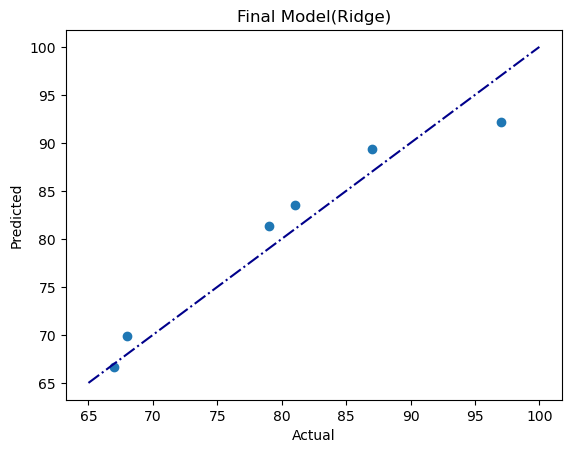

In [62]:
 plt.scatter(y_test, final_model_test_pred)

plt.plot([65,100],[65,100],color='darkblue',linestyle='-.',label = "Diagnol")
plt.ylabel("Predicted")
plt.xlabel('Actual')
plt.title('Final Model(Ridge)')

Text(0.5, 1.0, 'Linear regression Model')

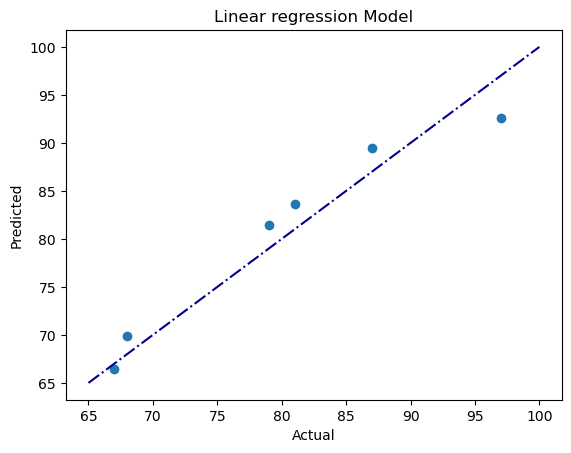

In [63]:
plt.scatter(y_test, lr_pred_test)
plt.plot([65,100],[65,100],color='darkblue',linestyle='-.',label = "Diagnol")
plt.ylabel("Predicted")
plt.xlabel('Actual')
plt.title('Linear regression Model')

In [64]:
print('*'*5,'\tFinal Model\t','*'*5,' \nR2 Score = ',r2,'\nMean absolute error = ',mae_score,end='\n\n')
print('*'*5,'\tLinear Regression \t','*'*5,' \nR2 Score = ',lr_r2_test_score,'\nMean absolute error = ',mean_absolute_error(y_test, lr_pred_test))


***** 	Final Model	 *****  
R2 Score =  0.9323229579156243 
Mean absolute error =  2.37837525609352

***** 	Linear Regression 	 *****  
R2 Score =  0.9343083487044459 
Mean absolute error =  2.420445525246206


### Conclusion

- From Above Results we can say tht both Linear Regression Model and Final Ridge model are giving almost similar result.
- Final Model is giving Less Mean absolute error as compare to Linear Regression model

### Saving Model

In [65]:
import pickle
with open(r"C:\Users\kiran\Desktop\datatrained\Internship\Final Evaluation projets\First-Phase-Evaluation-Projects--1-\baseball\finalridge_classifier_model.pkl", 'wb') as file:
    pickle.dump(final_model, file)